## 1.Data Collection and Preprocessing


In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("employee_data.csv")

In [3]:
df.sample(3)

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
48,49,Linda Martinez,42,Engineering,91000,15,91,No
51,52,Jane Johnson,38,HR,68000,12,88,No
19,20,Sandra Roberts,55,Sales,79000,22,83,Yes


In [4]:
df.info()  #Checking the info the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EmployeeID        100 non-null    int64 
 1   Name              100 non-null    object
 2   Age               100 non-null    int64 
 3   Department        100 non-null    object
 4   Salary            100 non-null    int64 
 5   YearsAtCompany    100 non-null    int64 
 6   PerformanceScore  100 non-null    int64 
 7   Attrition         100 non-null    object
dtypes: int64(5), object(3)
memory usage: 6.4+ KB


In [5]:
df.duplicated().sum()  # Checking for the duplicate values in the dataset

0

In [6]:
df['Department'].unique()  # No inconsistent data present in this feature

array(['Sales', 'HR', 'Engineering', 'Marketing'], dtype=object)

In [7]:
df['Salary'].describe()

count      100.000000
mean     72820.000000
std      12643.823102
min      43000.000000
25%      65000.000000
50%      72000.000000
75%      82750.000000
max      95000.000000
Name: Salary, dtype: float64

**Feature Engineering**

In [8]:
#Removing Unnecessary features 
df = df.drop(columns = ['EmployeeID', 'Name'])

In [9]:
#Encoding Department and attribute features 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [10]:
df['Department'] =le.fit_transform(df['Department'])
df['Attrition'] =le.fit_transform(df['Attrition'])

In [11]:
df.head()

,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,29,3,55000,3,80,0
1,35,1,60000,7,85,0
2,40,0,80000,10,95,1
3,28,2,65000,5,78,0
4,50,3,75000,20,88,1


## 2. Exploratory Data Analysis (EDA)


In [12]:
df.describe()

,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,36.570000,1.440000,72820.000000,10.800000,84.940000,0.390000
std,8.318478,1.157496,12643.823102,6.361183,6.349771,0.490207
min,25.000000,0.000000,43000.000000,1.000000,70.000000,0.000000
25%,29.750000,0.000000,65000.000000,5.000000,80.000000,0.000000
50%,35.000000,1.000000,72000.000000,10.000000,85.500000,0.000000
75%,41.250000,3.000000,82750.000000,16.000000,90.000000,1.000000
max,60.000000,3.000000,95000.000000,25.000000,95.000000,1.000000


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

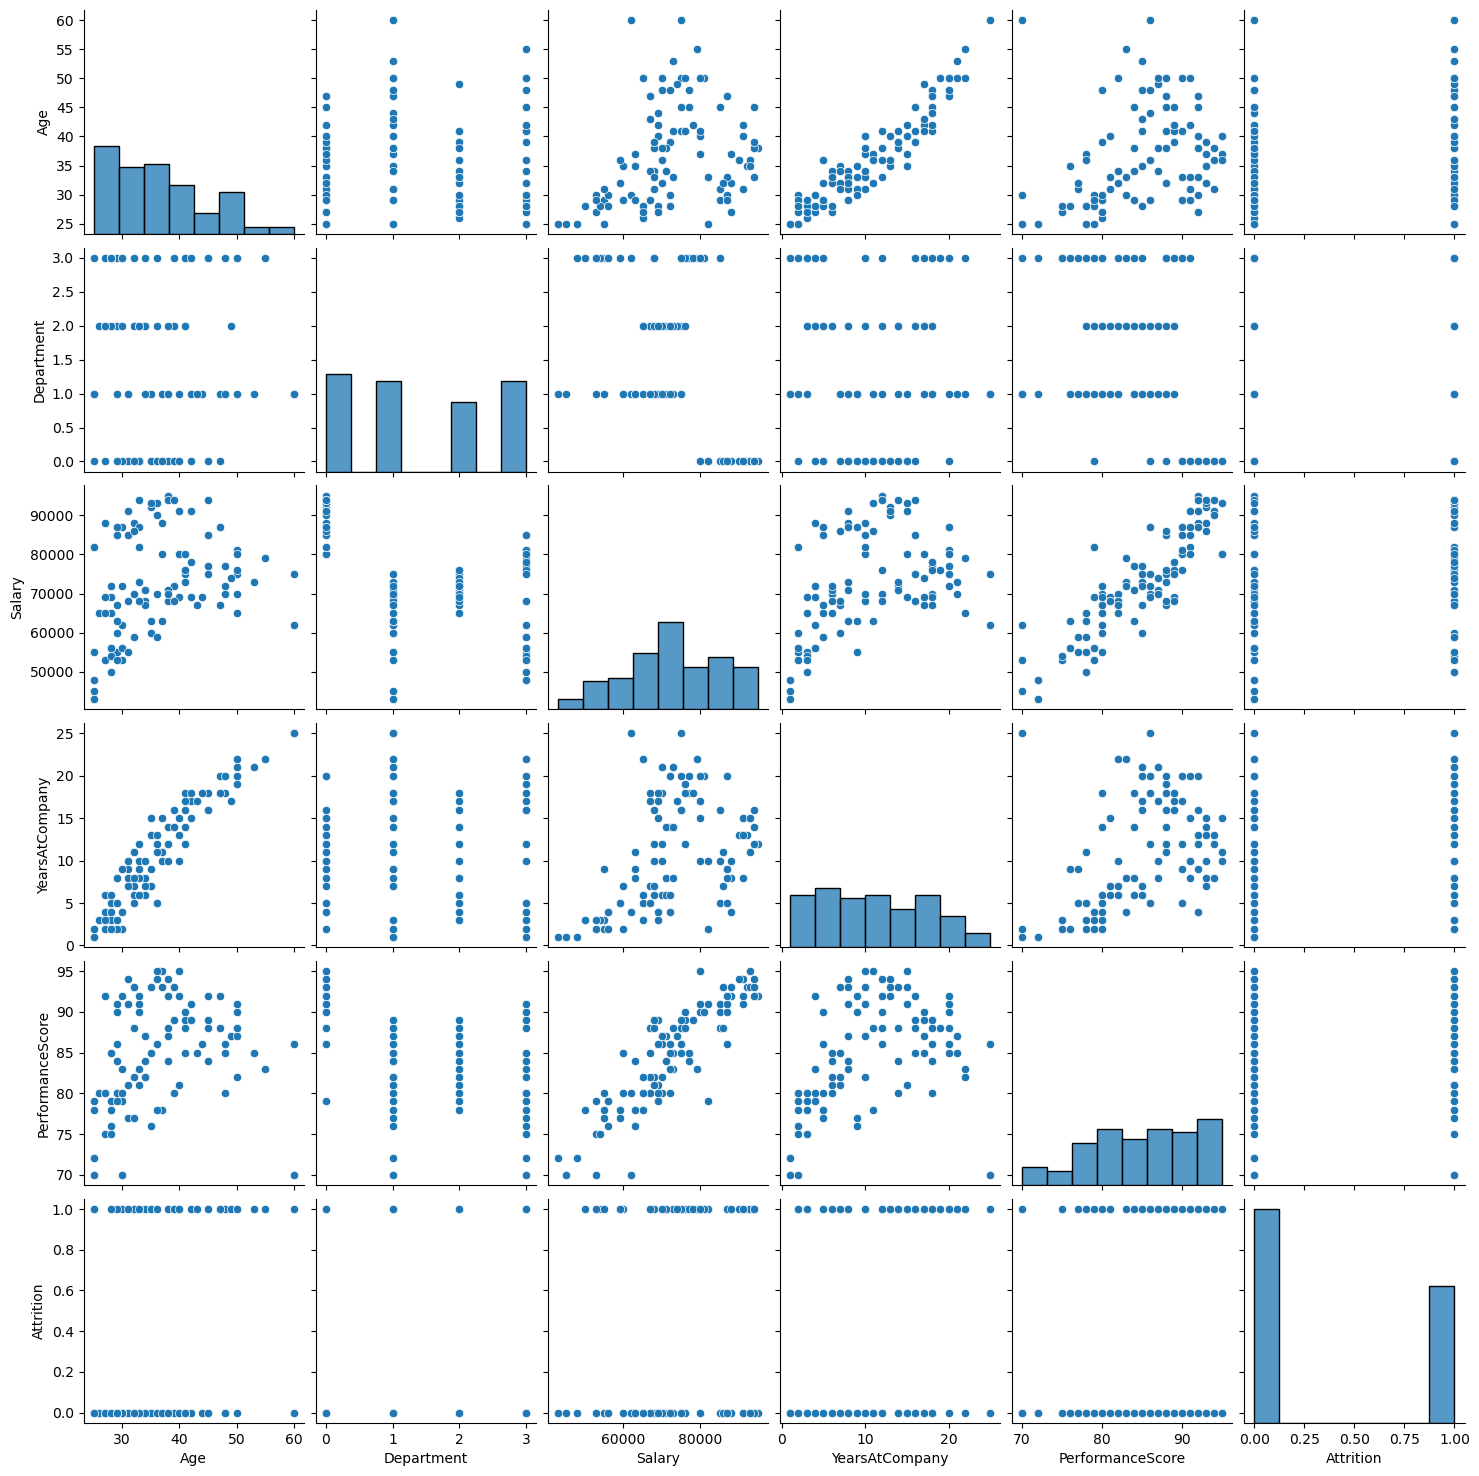

In [14]:
sns.pairplot(df)

In [15]:
df.head(1)

,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,29,3,55000,3,80,0


In [16]:
new_df = df[['Age', 'Salary', 'YearsAtCompany', 'PerformanceScore', 'Department', 'Attrition']]

<Axes: >

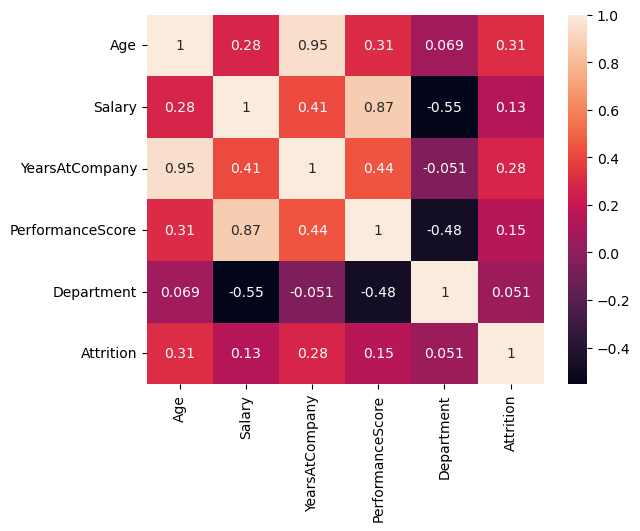

In [17]:
sns.heatmap(new_df.corr(), annot =True)

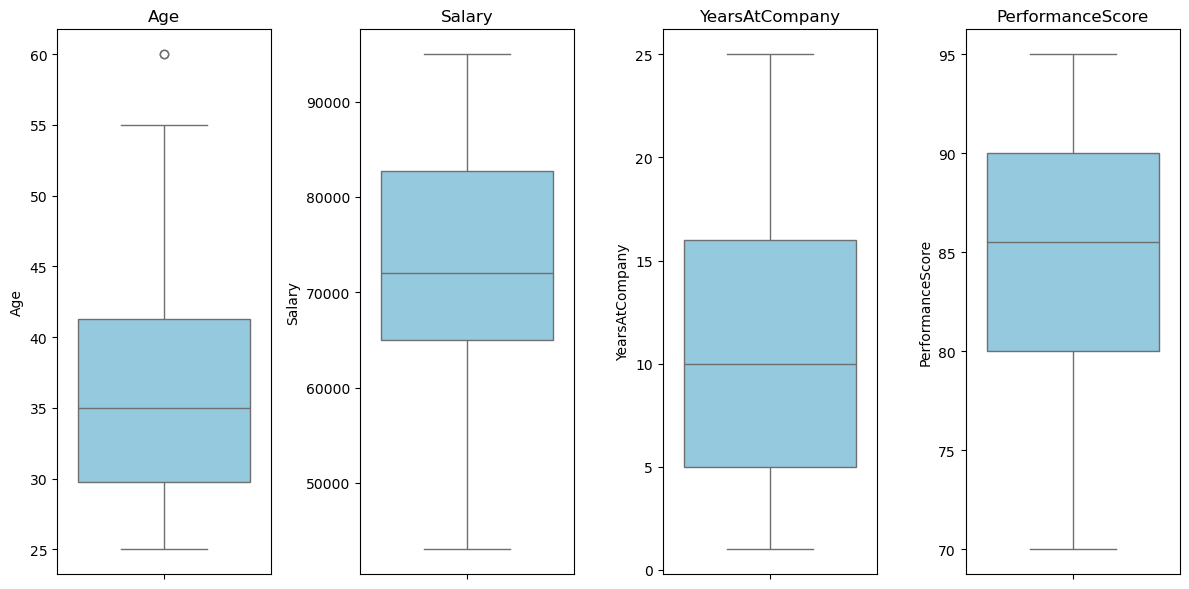

In [18]:
num_cols = ["Age", "Salary", "YearsAtCompany", "PerformanceScore"]

# Plot boxplots for each numeric feature
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)   # one subplot per feature
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(col)

plt.tight_layout()
plt.show()
#No outliers are present 

## 3. Probability and Statistical Analysis

In [23]:
#Probability

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

df_copy = df.copy()

# Encode categorical column (Department: Sales, Engineering, Marketing, HR)
label_encoder = LabelEncoder()
df_copy['Department'] = label_encoder.fit_transform(df_copy['Department'])

# Features and target
X = df_copy[['PerformanceScore', 'Department']]
y = df_copy['Attrition'] 

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# --- Predict probability for all employees in test set ---
probs = model.predict_proba(X_test)[:, 1]  # probability of leaving
results = X_test.copy()
results['Actual'] = y_test.values
results['Leave_Probability'] = probs

print(results.head())
# Change 'Department' to one of: Sales, Engineering, Marketing, HR
new_employee = pd.DataFrame({
    'PerformanceScore': [75],
    'Department':[1]
})
probability = model.predict_proba(new_employee)[:, 1][0]
print(f"Probability of leaving: {probability:.2f}")


    PerformanceScore  Department  Actual  Leave_Probability
83                84           1       0           0.355001
53                89           2       0           0.513591
70                92           0       0           0.429038
45                83           2       0           0.403713
44                94           0       0           0.465643
Probability of leaving: 0.22


In [24]:
# Bayes' Theorem

import pandas as pd
import numpy as np
from scipy.stats import norm


def bayes_probability(df, score):
    # Split data into attrition = 1 and attrition = 0
    left = df[df['Attrition'] == 1]['PerformanceScore']
    stayed = df[df['Attrition'] == 0]['PerformanceScore']
    
    # Priors
    p_left = len(left) / len(df)
    p_stayed = 1 - p_left
    
    # Gaussian parameters
    mu_left, sigma_left = left.mean(), left.std(ddof=0)
    mu_stayed, sigma_stayed = stayed.mean(), stayed.std(ddof=0)
    
    # Likelihoods
    p_score_given_left = norm.pdf(score, mu_left, sigma_left)
    p_score_given_stayed = norm.pdf(score, mu_stayed, sigma_stayed)
    
    # Bayes theorem
    numerator = p_score_given_left * p_left
    denominator = numerator + (p_score_given_stayed * p_stayed)
    posterior = numerator / denominator
    
    return posterior

# Example: probability of attrition given performance score = 68
score = 68
prob = bayes_probability(df, score)
print(f"P(Attrition=1 | Score={score}) = {prob:.4f}")


P(Attrition=1 | Score=68) = 0.1403


In [25]:
# Hypothesis Testing 

import pandas as pd
from scipy.stats import f_oneway

# Split performance scores by department
sales = df_copy[df_copy['Department'] == 'Sales']['PerformanceScore']
engineering = df_copy[df_copy['Department'] == 'Engineering']['PerformanceScore']
marketing = df_copy[df_copy['Department'] == 'Marketing']['PerformanceScore']
hr = df_copy[df_copy['Department'] == 'HR']['PerformanceScore']

# Perform One-way ANOVA
f_stat, p_value = f_oneway(sales, engineering, marketing, hr)

print("F-statistic:", f_stat)
print("p-value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("✅ Reject H₀: The mean performance score differs across departments.")
else:
    print("❌ Fail to reject H₀: No significant difference in mean performance scores across departments.")


F-statistic: nan
p-value: nan
❌ Fail to reject H₀: No significant difference in mean performance scores across departments.


C:\Users\prate\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


**4.Feature Engineering and Encoding**

In [26]:
df.head()

,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,29,3,55000,3,80,0
1,35,1,60000,7,85,0
2,40,0,80000,10,95,1
3,28,2,65000,5,78,0
4,50,3,75000,20,88,1


In [27]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [28]:
features =['Salary', 'PerformanceScore']
df[features] = mms.fit_transform(df[features])

**5. Employee Attrition Prediction Model**

In [29]:
X= df.iloc[:, :-1]
y= df.iloc[:, -1]

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

In [32]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [34]:
y_pred = rfc.predict(X_test)

In [35]:
accuracy_score(y_test, y_pred)

0.75

In [36]:
recall_score(y_test, y_pred)

0.5714285714285714

In [37]:
precision_score(y_test, y_pred)

0.6666666666666666

In [38]:
f1_score(y_test, y_pred)

0.6153846153846154

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
confusion_matrix(y_test,y_pred)


array([[11,  2],
       [ 3,  4]], dtype=int64)

**6. Employee Performance Prediction Model**

In [41]:
df.sample()

,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
45,33,2,0.576923,8,0.52,0


In [42]:
X1= df.drop(columns = ['PerformanceScore', 'Attrition'])
y1= df['PerformanceScore']

In [43]:
X1_train,X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [44]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [45]:
lr.fit(X1_train, y1_train)

LinearRegression()

In [46]:
y1_pred = lr.predict(X1_test)

In [47]:
from sklearn.metrics import r2_score, mean_squared_error

In [48]:
r2 = r2_score(y1_test, y1_pred)
mse = mean_squared_error(y1_test, y1_pred)

In [49]:
r2

0.7514693739822028

In [50]:
mse

0.02030395802314997

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

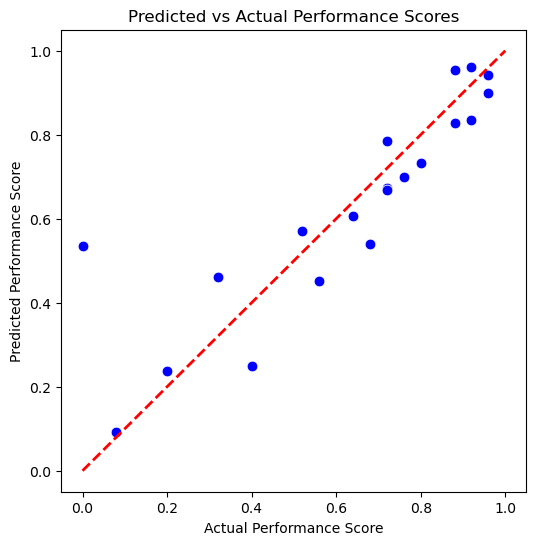

In [52]:
plt.figure(figsize = (6,6))
sns.scatterplot(x=y1_test, y=y1_pred, color='b', s=60)
plt.plot([y1.min(), y1.max()], [y1.min(), y1.max()], 'r--', lw=2)
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.title("Predicted vs Actual Performance Scores")
plt.show()

**7.Deep Learning for Employee Performance Prediction**

In [53]:
df.sample()

,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
1,35,1,0.326923,7,0.6,0


In [54]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

In [55]:
X2 = df.drop(columns = ['PerformanceScore', 'Attrition', 'YearsAtCompany'])
y2 = df['PerformanceScore']

In [56]:
X2_train,X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [57]:
model = Sequential()

model.add(Dense(16, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [58]:
model.compile(loss=['mse'],metrics=['accuracy'])

In [59]:
model.fit(X2_train, y2_train, epochs = 100) #Very poor accuracy due to small dataset

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.0250 - loss: 3.0056
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.0625 - loss: 0.1637
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0625 - loss: 0.0424
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0625 - loss: 0.0351
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0625 - loss: 0.0308
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.0625 - loss: 0.0275     
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.0625 - loss: 0.0275
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0625 - loss: 0.0236
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0625 - loss: 0.0252 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0625 - loss: 0.0253 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.0625 - loss: 0.0352
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.06

In [60]:
model.predict(X2_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


array([[0.5937662 ],
       [0.8504391 ],
       [0.9621072 ],
       [0.72152376],
       [1.1617298 ],
       [0.43444824],
       [0.9337387 ],
       [1.092308  ],
       [0.9919815 ],
       [0.45714378],
       [0.3345251 ],
       [0.86635923],
       [1.0923033 ],
       [0.96766853],
       [1.1790886 ],
       [0.9232111 ],
       [0.83943176],
       [1.0749278 ],
       [0.71263075],
       [0.69109774]], dtype=float32)

**8. Employee Attrition Analysis with Deep Learning**

In [61]:
X3 = df.drop(columns = ['Attrition','YearsAtCompany', 'Salary'])
y3 = df['Attrition']

In [62]:
X3_train,X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [63]:
model2 = Sequential()
model2.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [64]:
model.compile(loss= 'binary_crossentropy', optimizer= 'Adam', metrics = ['accuracy'])

In [65]:
model.fit(X3_train, y3_train, epochs= 25)

Epoch 1/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.6000 - loss: 0.6894
Epoch 2/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6000 - loss: 0.6866
Epoch 3/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6000 - loss: 0.6865 
Epoch 4/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6000 - loss: 0.6859
Epoch 5/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6000 - loss: 0.6864
Epoch 6/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6000 - loss: 0.6854
Epoch 7/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6000 - loss: 0.6852
Epoch 8/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6000 - loss: 0.6851
Epoch 9/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6000 - loss: 0.6852
Epoch 10/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6000 - loss: 0.6848
Epoch 11/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6000 - loss: 0.6849
Epoch 12/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6000 - loss: 0.6849


In [66]:
y3_pred_prob = model.predict(X3_test)
y3_pred = (y3_pred_prob > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


In [67]:
acc = accuracy_score(y3_test, y3_pred)
prec = precision_score(y3_test, y3_pred)
rec = recall_score(y3_test, y3_pred)
f1 = f1_score(y3_test, y3_pred)

C:\Users\prate\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [68]:
print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("F1 Score :", f1)

Accuracy : 0.65
Precision: 0.0
Recall   : 0.0
F1 Score : 0.0


**9.Insights and Recommendations**

**Key Features**

Key Factors in Employee Performance: The Linear Regression model explained 75% of the variance (R² = 0.75) in employee performance scores. The correlation heatmap shows that the most important factors driving higher performance are a higher salary and more years at the company.

Key Factors in Employee Attrition: The heatmap also highlights key predictors of attrition. Employees with lower performance scores and fewer years at the company are most likely to leave. The Random Forest model, achieving 75% accuracy, confirms that these factors reliably indicate who is at risk of leaving.

**Recommend strategies to improve retention,**

Proactive Performance Improvement & Recognition Programs: For employees with declining performance, implement supportive Performance Improvement Plans focused on training and development. For high performers, introduce recognition programs to reward contributions and retain valuable, experienced staff.

Early-Tenure Employee Engagement: Employees with fewer years at the company are more likely to leave. Strengthen onboarding and provide targeted engagement for employees in their first 1–5 years, including mentorship, regular check-ins, and clear career path guidance to boost loyalty.

Department-Specific Attrition Analysis: Analyze attrition rates across departments (Sales, HR, Engineering, Marketing) to identify high-risk teams. 

**10. Data Visualization and Reporting**

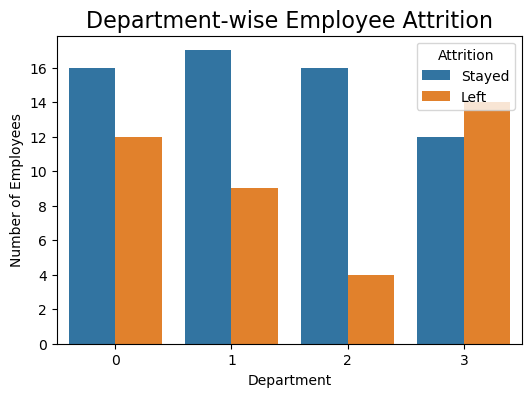

In [69]:
#Barplot
plt.figure(figsize=(6, 4))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Department-wise Employee Attrition', fontsize=16)
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition', labels=['Stayed', 'Left'])
plt.show()

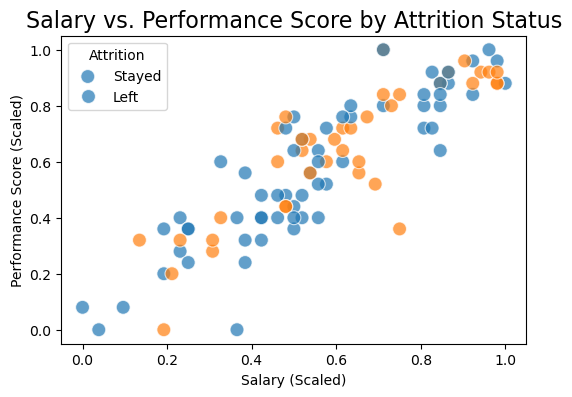

In [70]:
#Scatterplot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Salary', y='PerformanceScore', hue='Attrition', data=df, s=100, alpha=0.7)
plt.title('Salary vs. Performance Score by Attrition Status', fontsize=16)
plt.xlabel('Salary (Scaled)')
plt.ylabel('Performance Score (Scaled)')
plt.legend(title='Attrition', labels=['Stayed', 'Left'])
plt.show()

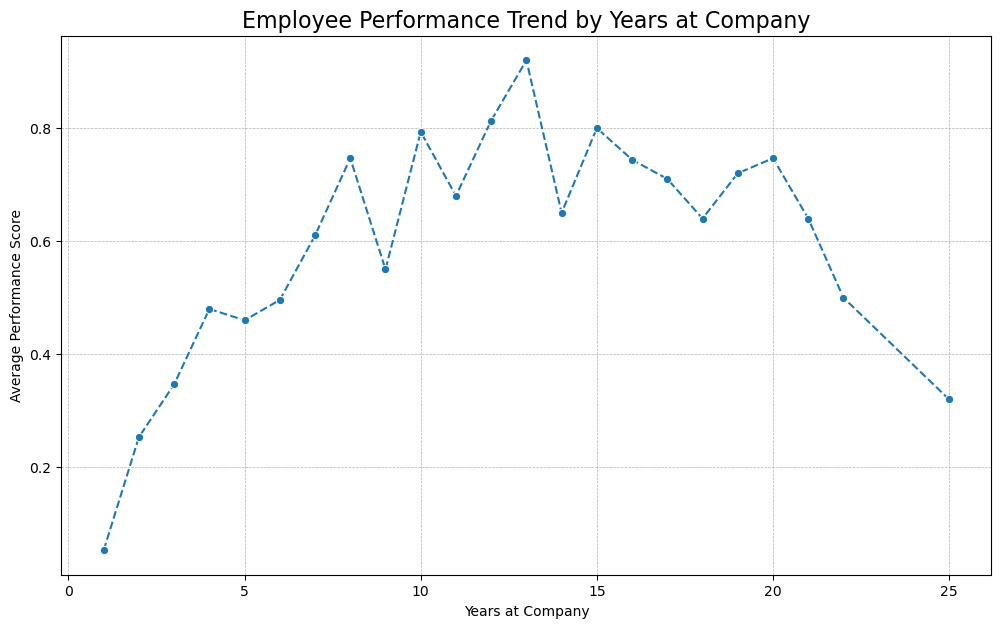

In [71]:
#Line PLots

performance_trend = df.groupby('YearsAtCompany')['PerformanceScore'].mean()

# Create the line plot
plt.figure(figsize=(12, 7))
sns.lineplot(x=performance_trend.index, y=performance_trend.values, marker='o', linestyle='--')

plt.title('Employee Performance Trend by Years at Company', fontsize=16)
plt.xlabel('Years at Company')
plt.ylabel('Average Performance Score')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

**PROJECT REPORT**

The project successfully analyzed a dataset of 100 employees to predict both attrition and performance. After cleaning the data and encoding categorical features, two machine learning models were built. A Random Forest Classifier predicted employee attrition with 75% accuracy, identifying performance score and tenure as key factors. A Linear Regression model predicted employee performance with an R² score of 0.75, showing a strong link between performance, salary, and years at the company. The analysis concluded that while traditional models performed well, the small dataset limited the effectiveness of deep learning approaches. The insights derived from these models form the basis for targeted retention strategies.